<font color='red'>Necessário melhorar/implementar:</font>
* adicionar descrição inicial do projeto
* criar todo este arquivo como slide

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('diagnostico-tic-prefeitura-sp-2020.csv', sep=';', encoding='latin-1')

In [161]:
def color_string(string):
    return f'\033[94m{string}\033[00m'

def set_style_df(df):
    return df.style.set_properties(**{'text-align': 'left'}).hide()

def set_style_df2(df):
    df = set_style_df(df)
    return df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

### 1. Separado por categorias, segue a quantidade de órgãos que responderam à pesquisa

In [4]:
quantidades = dict(dados['Q06'].value_counts())
set_style_df2(pd.DataFrame(quantidades.items(), columns=['Órgão', 'Qtde.']))

Órgão,Qtde.
Subprefeitura,32
Secretaria Municipal,24
"Autarquia, Fundação ou Empresa",15


### 2. Pessoas que trabalharam, de forma dedicada à TI, na Prefeitura de São Paulo

In [162]:
print('Um total de {} pessoas'.format(color_string(dados['Q201'].sum())))

Um total de 762 pessoas


### 3. Proporção de pessoas que trabalharam de forma dedicada à TI na Prefeitura de São Paulo, por categoria.

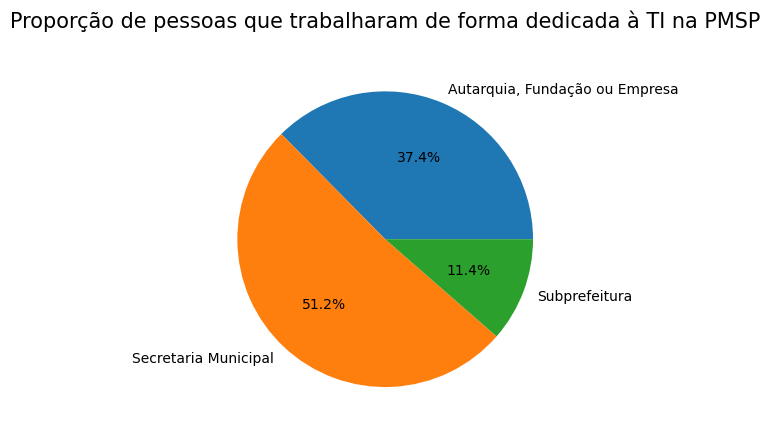

In [31]:
sub_df = pd.DataFrame(dados[['Q201', 'Q06']].groupby('Q06').sum())

plt.pie(sub_df['Q201'], labels=sub_df.index, autopct = '%.1f%%',)
plt.title('Proporção de pessoas que trabalharam de forma dedicada à TI na PMSP', 
          fontsize=15, pad=20)
plt.show()

### 4. Quantidade de órgãos que utilizam alguma metodologia para gerenciamento de projetos

In [165]:
qtde = color_string(dados['Q713'].value_counts()['Sim'])
print(f'Há um total de {qtde} órgãos que utilizam de metodologias para o gerenciamento de projetos')


Há um total de 9 órgãos que utilizam de metodologias para o gerenciamento de projetos


### 5. Proporção de computadores que possuem mais de 5 anos e ainda são utilizados na Prefeitura de São Paulo

In [172]:
dados.fillna(0, inplace=True)

proprios = dados['Q1001[SQ001_SQ008]'].sum()
locados = int(dados['Q1001[SQ001_SQ009]'].sum())
proprios_5 = dados['Q1002[SQ001]'].sum()
inserviveis = dados['Q604[SQ001]'].sum()

total = (locados + proprios) - inserviveis
porcento = proprios_5*100/total

In [178]:
print('Proporção de computadores em uso com mais de cinco anos é de {}%'.format(color_string(porcento.round(1))))

Proporção de computadores em uso com mais de cinco anos é de 55.9%


### 6. Total de ativos de rede que estão sob gestão direta dos órgãos da Prefeitura de São Paulo, por tipo:

In [11]:
list_labels = [
'Computador desktop', 
'Impressora sem scanner', 
'Impressora Multifuncional', 
'Notebook', 
'Tablet', 
'Celular Corporativo', 
'Projetor multimídia', 
'Scanner de produção', 
'Nobreak'
]

In [12]:
list_columns, list_sums = [], []

for column in dados.columns:
    if column.startswith('Q1001'):
        list_columns.append(column)

for i, column in enumerate(list_columns):
    if column.endswith('_SQ008]'):
        list_sums.append(int(dados[column].sum() + dados[list_columns[i+1]].sum()))

dict_totais_ativos_rede = dict(zip(list_labels, list_sums))

In [13]:
ativos_rede_df = pd.DataFrame(dict_totais_ativos_rede.items(), columns=['Equipamento', 'Qtde.'])
ativos_rede_df.sort_values(by='Qtde.', ascending=False, inplace=True)
set_style_df2(ativos_rede_df)

Equipamento,Qtde.
Computador desktop,46525
Notebook,24608
Celular Corporativo,6184
Impressora Multifuncional,3426
Impressora sem scanner,1912
Projetor multimídia,855
Nobreak,772
Tablet,327
Scanner de produção,214


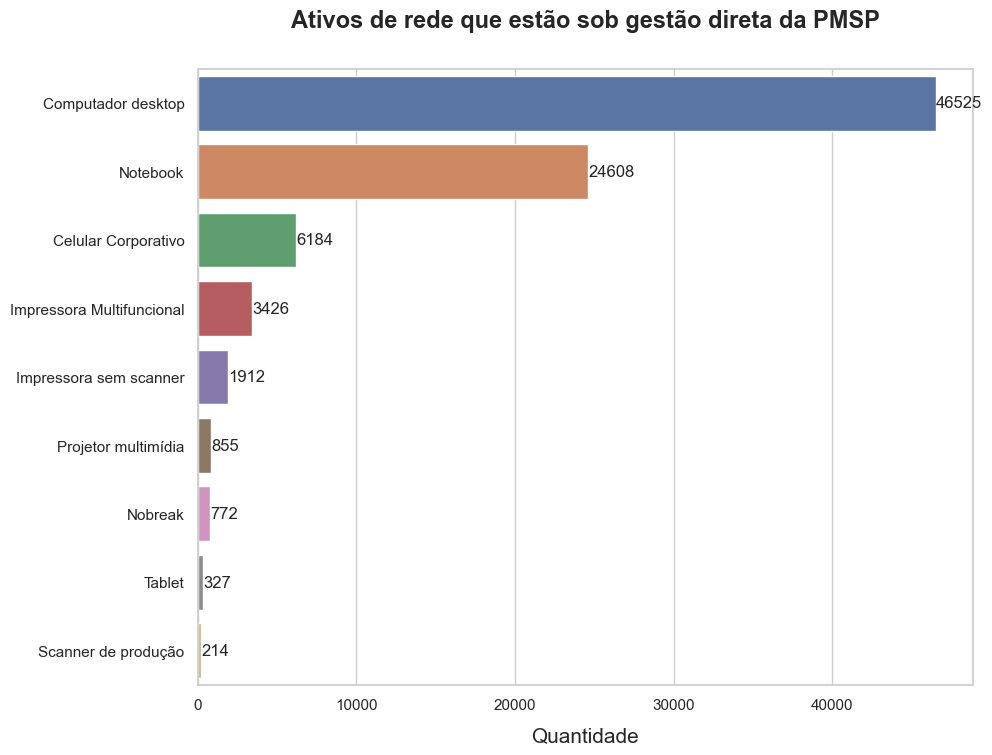

In [192]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
ax = sns.barplot(x=ativos_rede_df['Qtde.'], y=ativos_rede_df.Equipamento)
ax.set_xlabel('Quantidade', fontsize=15, labelpad=10)
ax.set_ylabel(None)
ax.set_title('Ativos de rede que estão sob gestão direta da PMSP', fontsize=17, fontweight='bold', pad=30)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### 7. Completar a frase observando o histograma

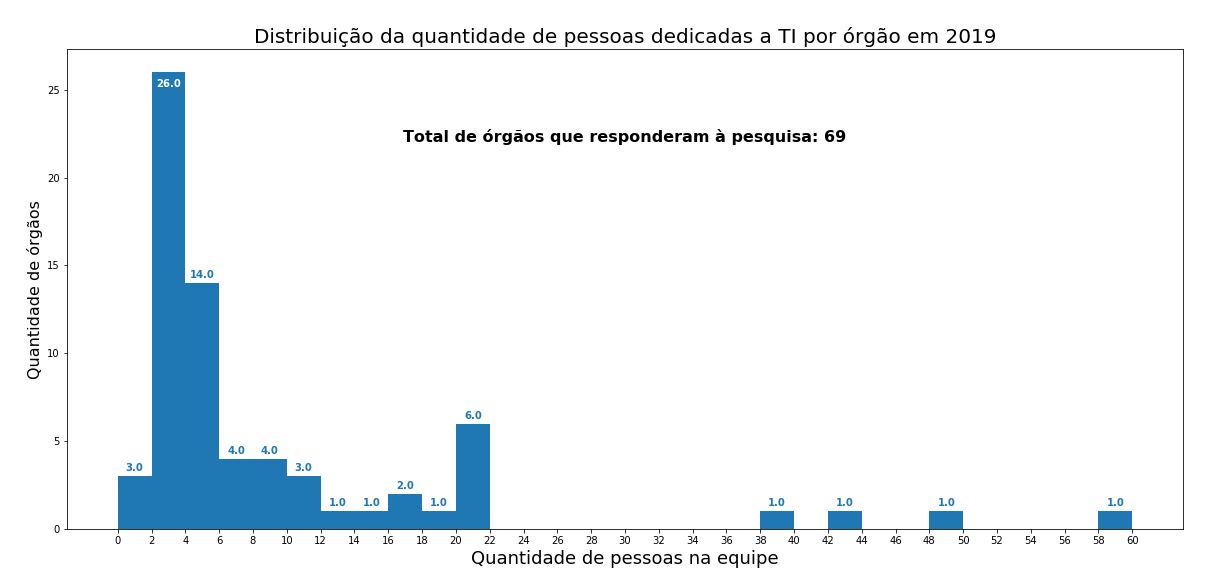

<i> "De acordo com o Diagnóstico de 2019, metade dos órgãos setoriais da prefeitura possuem, no máximo, <font color='blue'>três</font> pessoas trabalhando de forma dedicada à área de TI"</i>